# Public Transport Usage in Copenhagen

This notebook explores temporal patterns in public transport usage
in Copenhagen using aggregated boarding data.


## Dataset overview

The dataset contains aggregated public transport boardings in Copenhagen,
organized by date, hour, and transport mode (bus, metro, train).


## Analysis questions

- How does public transport usage vary by hour of day?
- What are the morning and evening peak hours?
- How do usage patterns differ between weekdays and weekends?
- Are there differences between transport modes?


In [ ]:
!pip install  numpy pandas matplotlib
!pip install seaborn



In [14]:
import pandas as pd

# Correct path
df = pd.read_csv("../data/data.csv")  # go up one directory if needed

# Check
df.head()


,hour,transport_mode,service_count
0,0,Bus,37200
1,0,Metro,39065
2,0,Train,4854
3,0,Tram,1696
4,1,Bus,17353


In [15]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hour            95 non-null     int64 
 1   transport_mode  95 non-null     object
 2   service_count   95 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


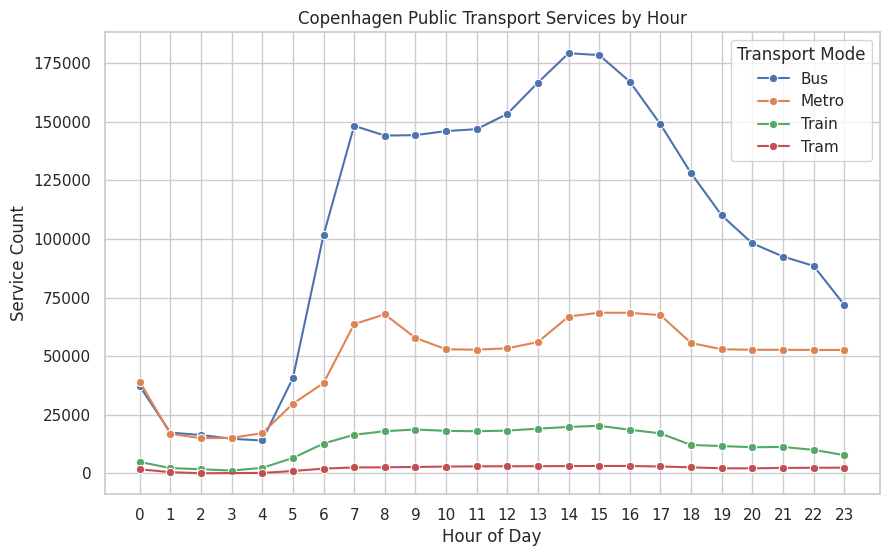

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="hour",
    y="service_count",
    hue="transport_mode",
    marker="o"
)
plt.title("Copenhagen Public Transport Services by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Service Count")
plt.xticks(range(0, 24))
plt.legend(title="Transport Mode")
plt.show()


In [17]:
plt.savefig("../figures/hourly_services.png", dpi=150)


<Figure size 640x480 with 0 Axes>

In [18]:
# Total services per transport mode
df.groupby("transport_mode")["service_count"].sum()

# Peak hour per mode
df.groupby("transport_mode").apply(lambda x: x.loc[x["service_count"].idxmax()])


/tmp/ipykernel_9531/3068756568.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("transport_mode").apply(lambda x: x.loc[x["service_count"].idxmax()])


,hour,transport_mode,service_count
transport_mode,,,
Bus,14,Bus,179208
Metro,15,Metro,68510
Train,15,Train,20258
Tram,15,Tram,3127
